# The hard-concrete distribution 

In [181]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import math
from scipy.stats import norm

# Set the font size
plt.rcParams['font.size'] = 16

Different norm penalties for a parameter $\xi$.

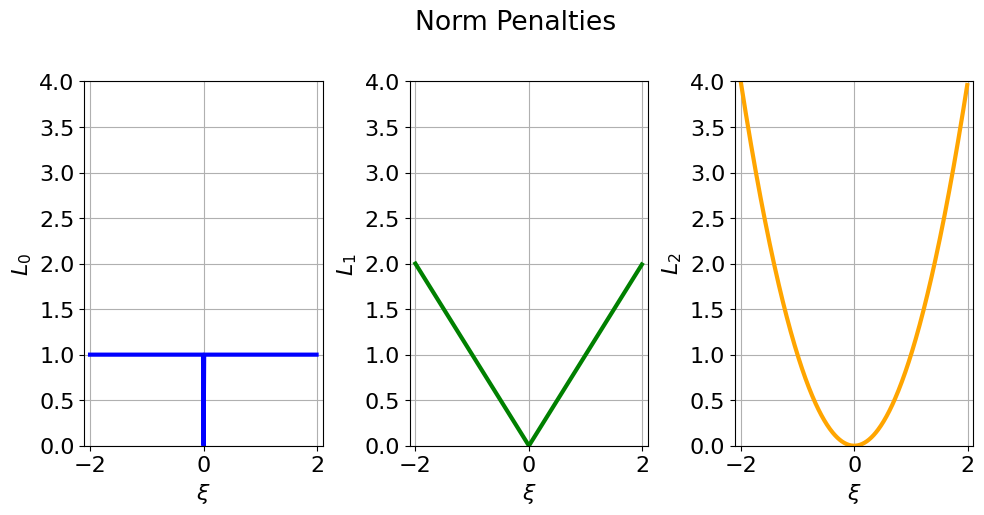

In [182]:
# Generate xi values
xi = np.arange(-2, 2, step=0.01)
xi = np.round(xi, 2)

# Define L0, L1, and L2 norms
norm_0 = np.ones_like(xi) 
norm_0[np.where(xi==0)] = 0.0
norm_1 = np.abs(xi)
norm_2 = np.square(xi)

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
fig.suptitle('Norm Penalties')
fig.tight_layout()

ax1.plot(xi, norm_0, color='blue', linewidth=3)
ax1.set_xlim([-2.1, 2.1])
ax1.set_ylim([0, 4.0])
ax1.set_xlabel(r'$\xi$')
ax1.set_ylabel(r'$L_0$')
ax1.grid(True)

ax2.plot(xi, norm_1, color='green', linewidth=3)
ax2.set_xlim([-2.1, 2.1])
ax2.set_ylim([0, 4.0])
ax2.set_xlabel(r'$\xi$')
ax2.set_ylabel(r'$L_1$')
ax2.grid(True)

ax3.plot(xi, norm_2, color='orange', linewidth=3)
ax3.set_xlim([-2.1, 2.1])
ax3.set_ylim([0, 4.0])
ax3.set_xlabel(r'$\xi$')
ax3.set_ylabel(r'$L_2$')
ax3.grid(True)

fig.savefig('figures/norm_penalties.png', bbox_inches='tight')

The "spike and slab" distribution.

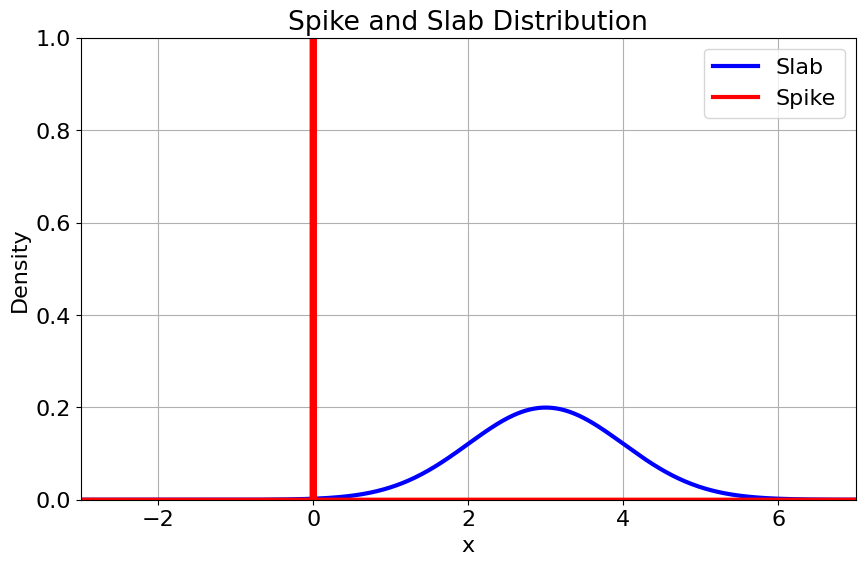

In [94]:
# Parameters for the spike and slab
spike_location = 0
spike_weight = 0.5
slab_mean = 3.0
slab_std = 1
slab_weight = 1 - spike_weight

# Generate x values
x = np.linspace(-7, 7, 1000)

# Spike component (Dirac delta function at zero, approximated by a very sharp peak)
spike_height = spike_weight / 0.01
spike = np.zeros_like(x)
spike[np.abs(x - spike_location) < 0.01] = spike_height

# Slab component (normal distribution)
slab = slab_weight * norm.pdf(x, loc=slab_mean, scale=slab_std)

# Combine spike and slab
combined = spike + slab

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, slab, label='Slab', color='blue', linewidth=3)
plt.plot(x, spike, label='Spike', color='red', linewidth=3)
plt.grid(True)
plt.ylim([0., 1.])
plt.xlim([-3., 7.])
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Spike and Slab Distribution')
plt.legend()

plt.savefig('figures/spike_slab.png', bbox_inches='tight')

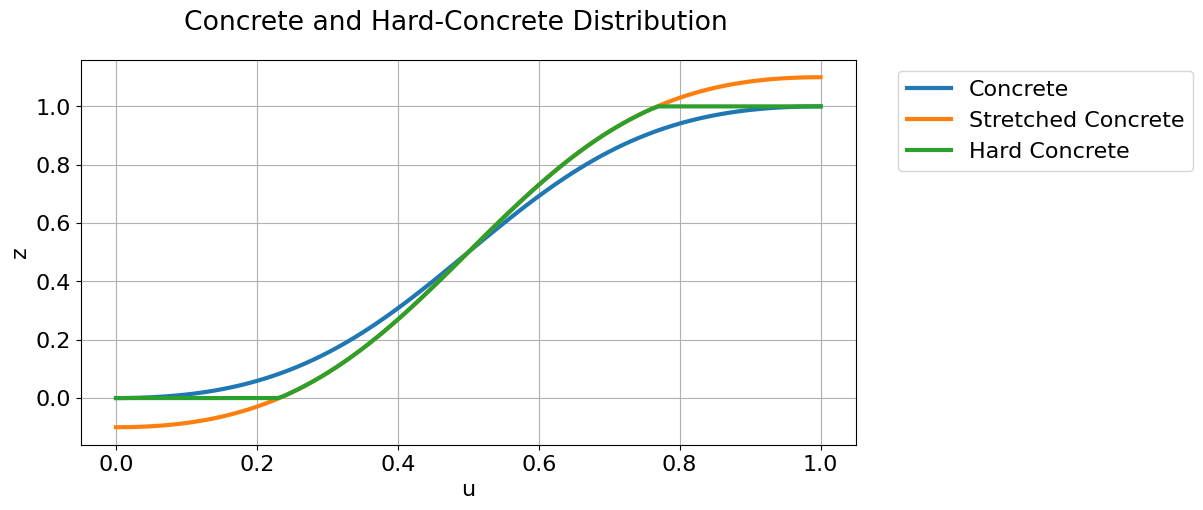

In [183]:
# Parameters of the hard-concrete distribution
in_features = 1
limit_a, limit_b, epsilon = -.1, 1.1, 1e-6
droprate_init = 0.5
logalpha = math.log(1 - droprate_init) - math.log(droprate_init) 
beta = 0.5
 
# Generate x values
eps = torch.arange(0.0, 1.01, step=0.01)

# Defome the concrete, stretched concrete, and hard concrete distributions (functions from https://github.com/AMLab-Amsterdam/L0_regularization)
concrete = torch.sigmoid((torch.log(eps) - torch.log(1 - x) + logalpha) / beta)
stretched_concrete = concrete * (limit_b - limit_a) + limit_a
hard_concrete = F.hardtanh(stretched_concrete, min_val=0, max_val=1)


# Plotting
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))
fig.suptitle('Concrete and Hard-Concrete Distribution')
ax1.plot(eps.detach().numpy(), concrete.detach().numpy(), linewidth=3, label='Concrete')
ax1.plot(eps.detach().numpy(), stretched_concrete.detach().numpy(), linewidth=3, label='Stretched Concrete')
ax1.plot(eps.detach().numpy(), hard_concrete.detach().numpy(), linewidth=3, label='Hard Concrete')
ax1.grid(True)
ax1.set_ylabel('z')
ax1.set_xlabel('u')
ax1.legend(loc='upper left', bbox_to_anchor=(1.04, 1))

plt.savefig('figures/hard_concrete.png', bbox_inches='tight')